In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

#Colab use
#from google.colab import files
#uploaded = files.upload()
#import io

In [2]:
# define column names for easy indexing
index_names = ['ID', 'Cycle']
setting_names = ['OpSet1', 'OpSet2', 'OpSet3']
sensor_names = ['SensorMeasure{}'.format(i) for i in range(1,22)] 
col_names = index_names + setting_names + sensor_names

raw_data = pd.read_csv("../Data/train_FD001.txt", sep='\s+', header=None, names=col_names)

#Colab use
#raw_data = pd.read_csv(io.BytesIO(uploaded['train_FD001.txt']), sep='\s+', header=None, names=col_names)

* **Column 1:** Corresponds to engine number (This column is indexed 0 above because of Python's numbering convention)

* **Column 2:** Corresponds to cycle number. If engine 1 fails after 192 cycles, the entries of second column for engine 1 will go from 1 to 192. Similarly for other engines.

* **Columns 3,4,5:** 3 operational settings

* **Columns 6-26:** 21 sensor measurements

In [3]:
raw_data.head()

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [4]:
print("Number of machine: ", len(raw_data['ID'].unique())) #number of engines
print("Number of Record: ", len(raw_data), "\n") #numbers of records

Number of machine:  100
Number of Record:  20631 



# Describe Dataset 

In [5]:
raw_data[index_names].describe()

,ID,Cycle
count,20631.000000,20631.000000
mean,51.506568,108.807862
std,29.227633,68.880990
min,1.000000,1.000000
25%,26.000000,52.000000
50%,52.000000,104.000000
75%,77.000000,156.000000
max,100.000000,362.000000


In [6]:
raw_data[index_names].groupby('ID').max().describe()

,Cycle
count,100.000000
mean,206.310000
std,46.342749
min,128.000000
25%,177.000000
50%,199.000000
75%,229.250000
max,362.000000


In [7]:
raw_data[setting_names].describe()

,OpSet1,OpSet2,OpSet3
count,20631.000000,20631.000000,20631.0
mean,-0.000009,0.000002,100.0
std,0.002187,0.000293,0.0
min,-0.008700,-0.000600,100.0
25%,-0.001500,-0.000200,100.0
50%,0.000000,0.000000,100.0
75%,0.001500,0.000300,100.0
max,0.008700,0.000600,100.0


In [8]:
raw_data[sensor_names].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SensorMeasure1,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
SensorMeasure2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
SensorMeasure3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
SensorMeasure4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
SensorMeasure5,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200
SensorMeasure6,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100
SensorMeasure7,20631.0,553.367711,8.850923e-01,549.8500,552.8100,553.4400,554.0100,556.0600
SensorMeasure8,20631.0,2388.096652,7.098548e-02,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
SensorMeasure9,20631.0,9065.242941,2.208288e+01,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900
SensorMeasure10,20631.0,1.300000,4.660829e-13,1.3000,1.3000,1.3000,1.3000,1.3000


In [9]:
print("Unique value")
raw_data.nunique(axis=0) #number of unique value

Unique value


ID                  100
Cycle               362
OpSet1              158
OpSet2               13
OpSet3                1
SensorMeasure1        1
SensorMeasure2      310
SensorMeasure3     3012
SensorMeasure4     4051
SensorMeasure5        1
SensorMeasure6        2
SensorMeasure7      513
SensorMeasure8       53
SensorMeasure9     6403
SensorMeasure10       1
SensorMeasure11     159
SensorMeasure12     427
SensorMeasure13      56
SensorMeasure14    6078
SensorMeasure15    1918
SensorMeasure16       1
SensorMeasure17      13
SensorMeasure18       1
SensorMeasure19       1
SensorMeasure20     120
SensorMeasure21    4745
dtype: int64

# Calculate RUL 

In [10]:
EOL = [] #Enf of Life of engine
for engine_id in raw_data['ID']:
    EOL.append(((raw_data[raw_data['ID'] == engine_id]["Cycle"]).values)[-1]) #last cycle of each engine

In [11]:
raw_data['EOL'] = EOL

raw_data["RUL"] = raw_data["EOL"]-raw_data["Cycle"] #RUL = End of Life - current cycle
raw_data = raw_data.drop(columns=['EOL'])

#raw_data.to_csv('train_set.csv', index=None)

#raw_data[index_names+['RUL']].head()
raw_data.head()

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


# Histogram 

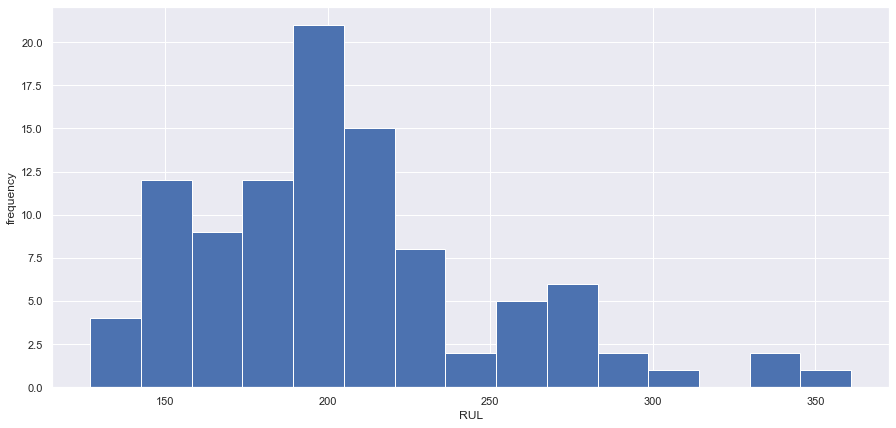

In [12]:
df_max_rul = raw_data[['ID', 'RUL']].groupby('ID').max().reset_index() #maximum RUL based on engine ID

df_max_rul['RUL'].hist(bins=15, figsize=(15,7))
plt.xlabel('RUL')
plt.ylabel('frequency')
plt.show()

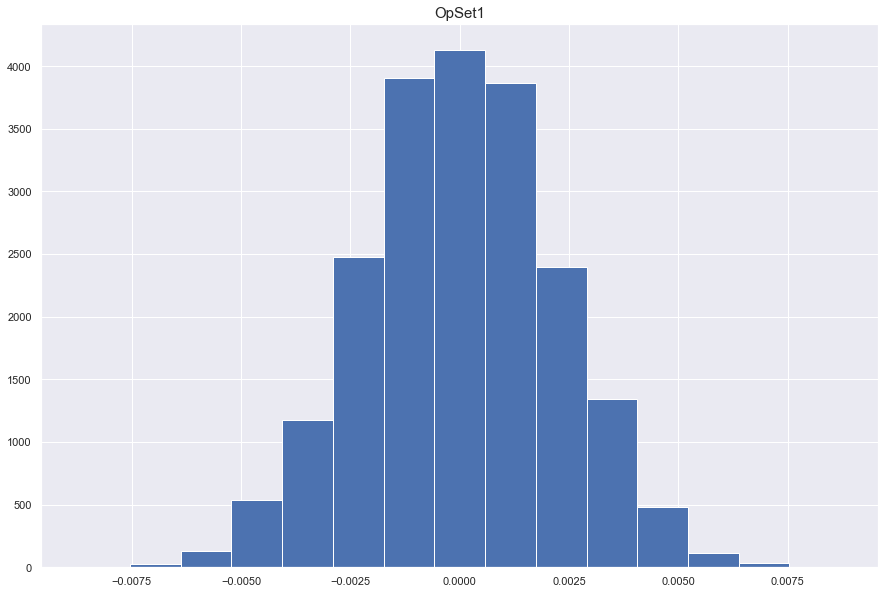

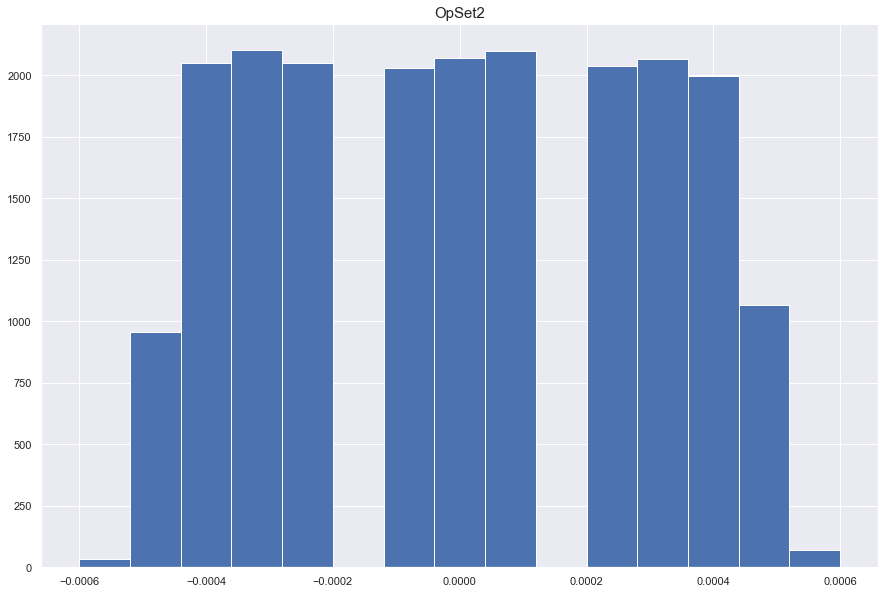

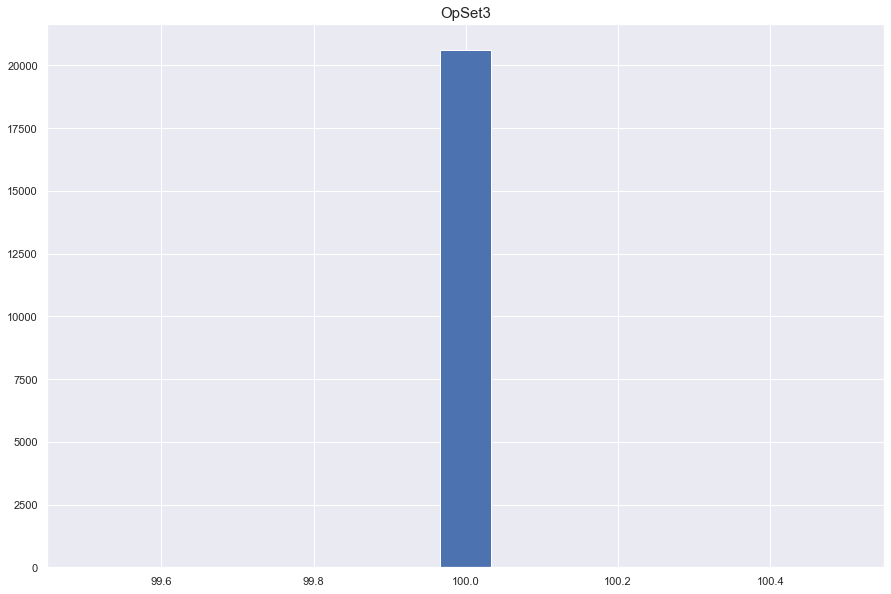

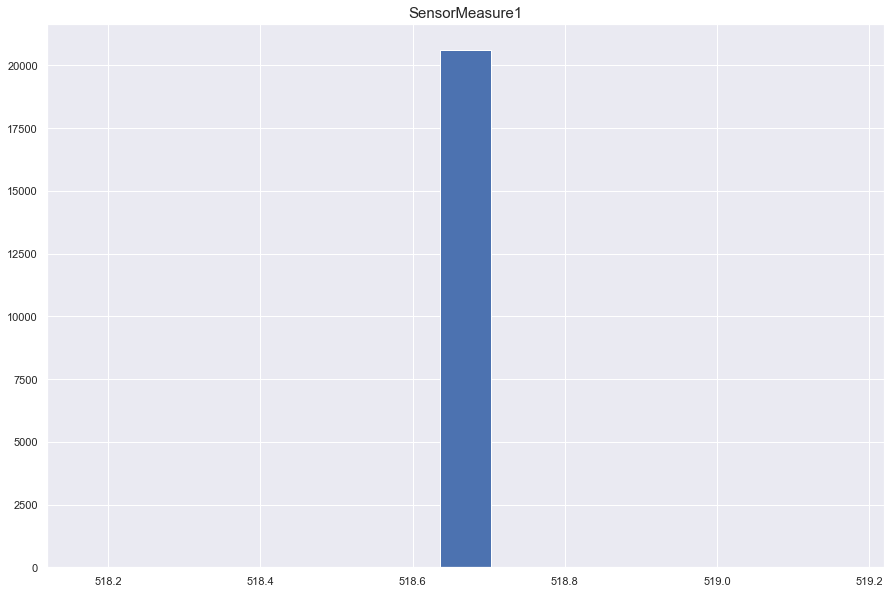

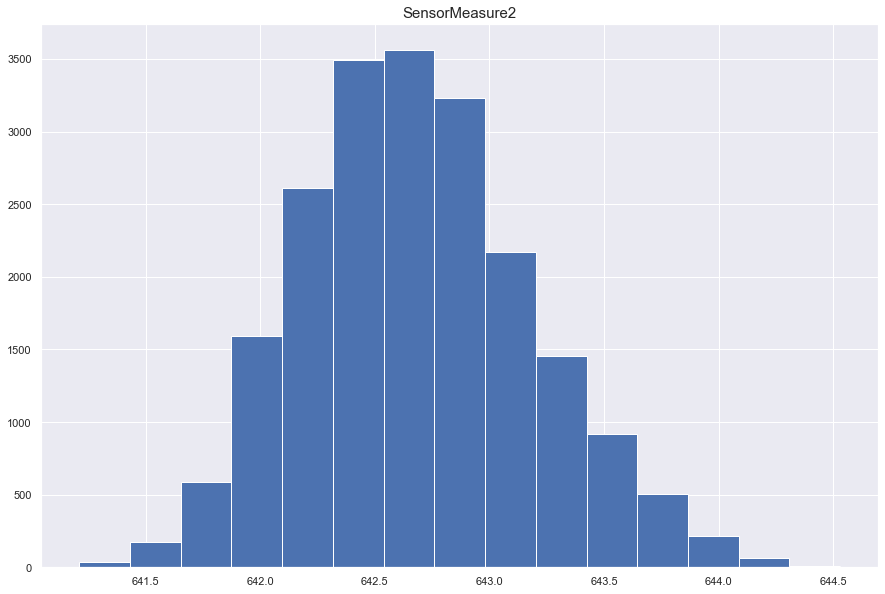

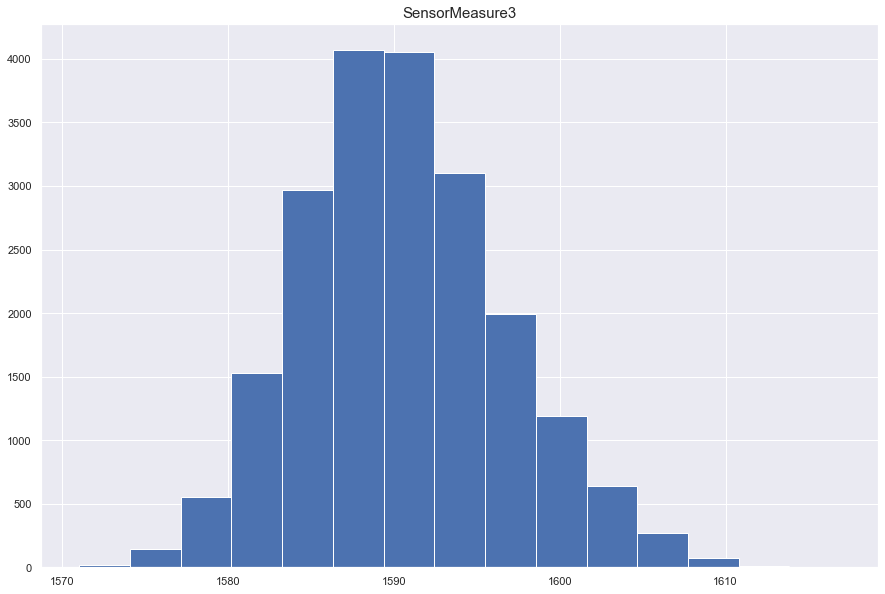

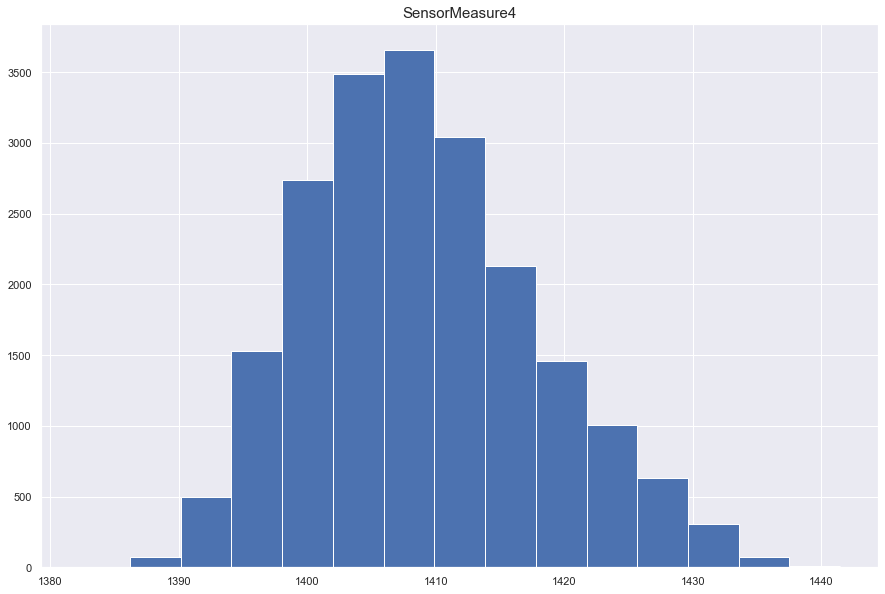

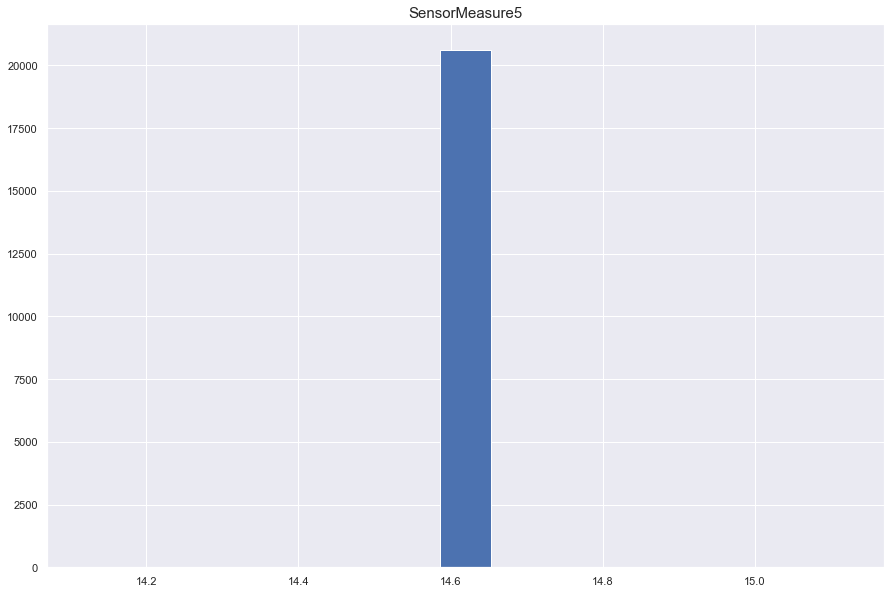

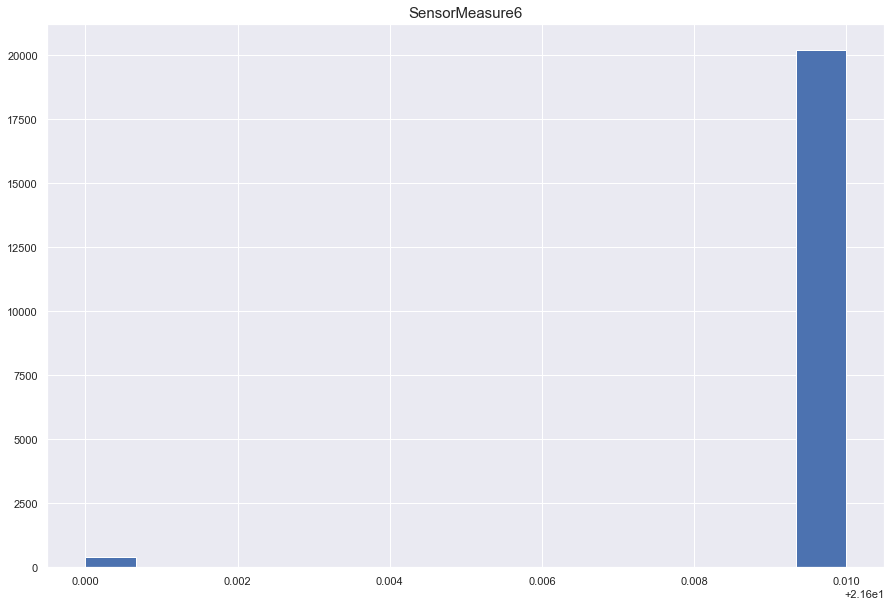

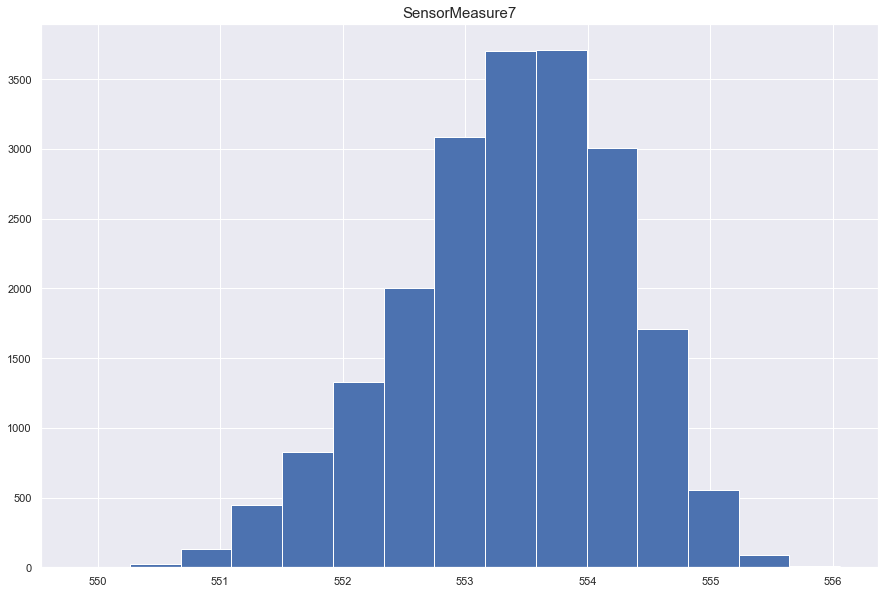

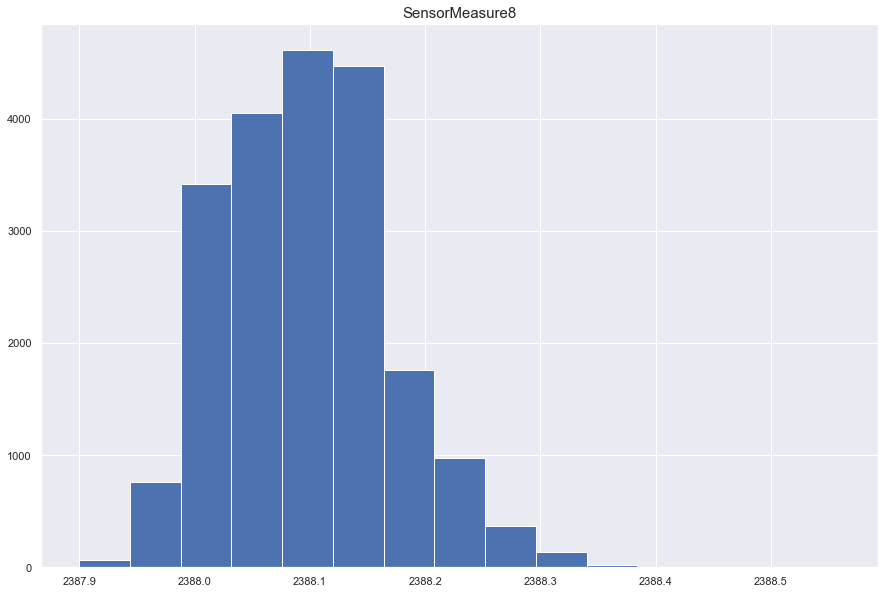

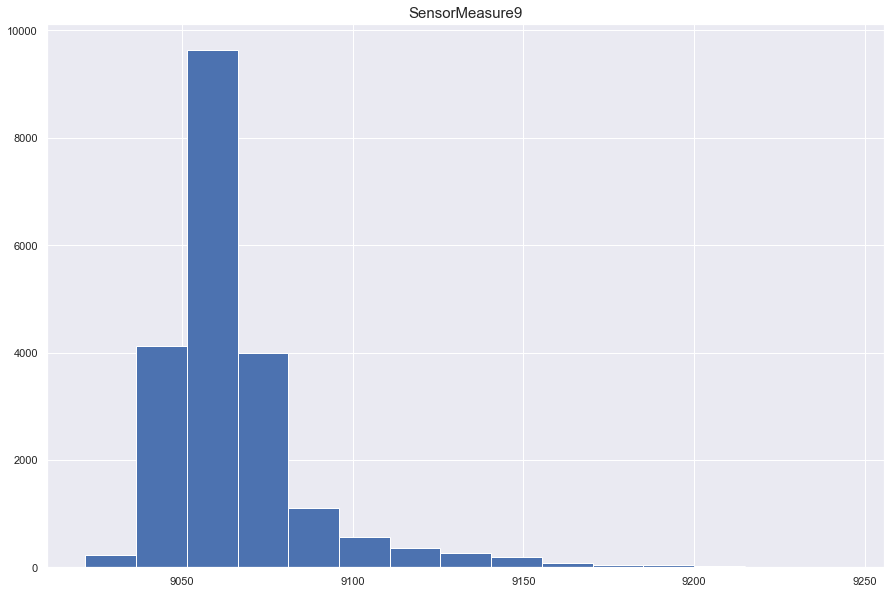

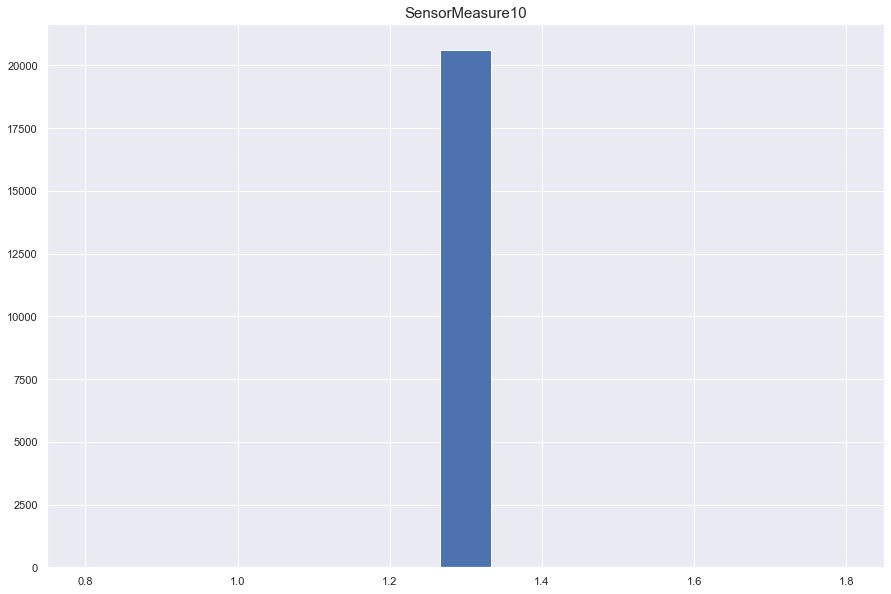

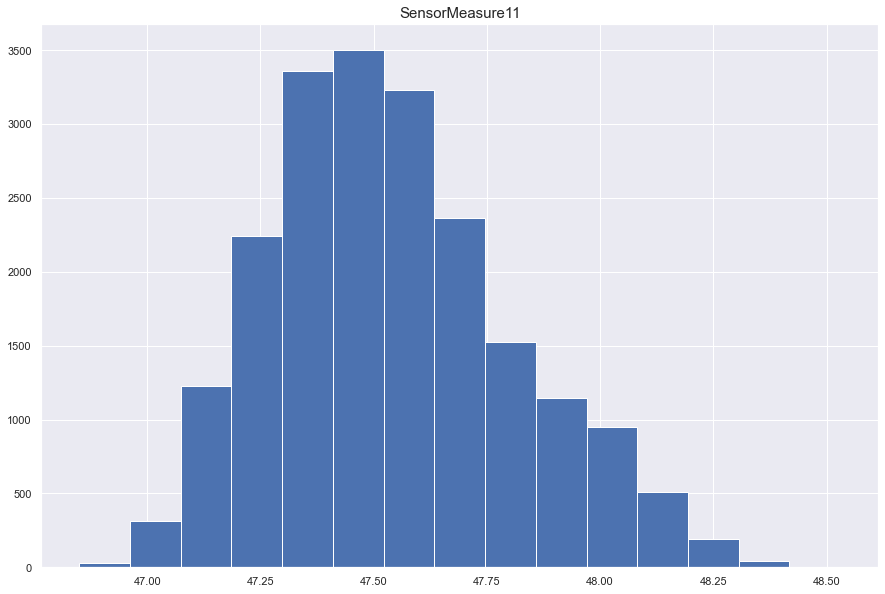

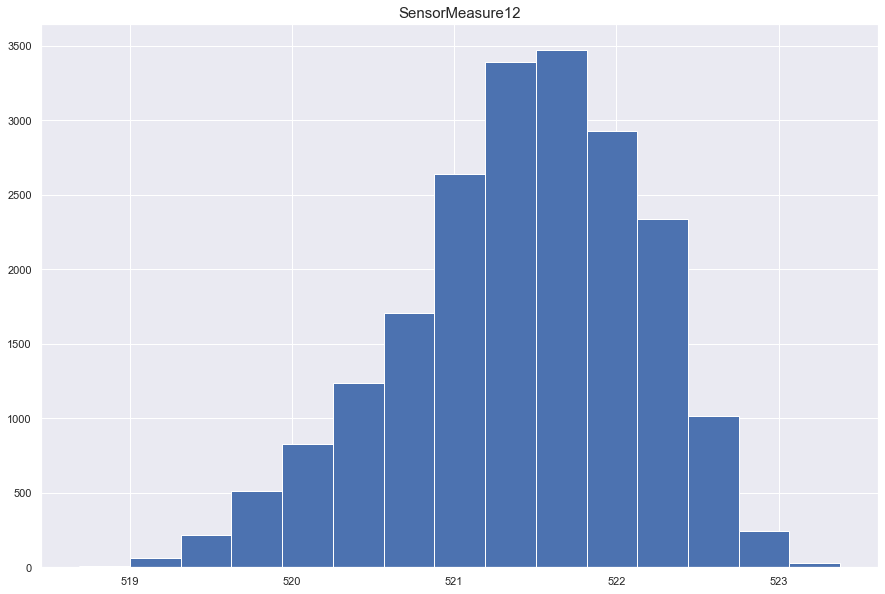

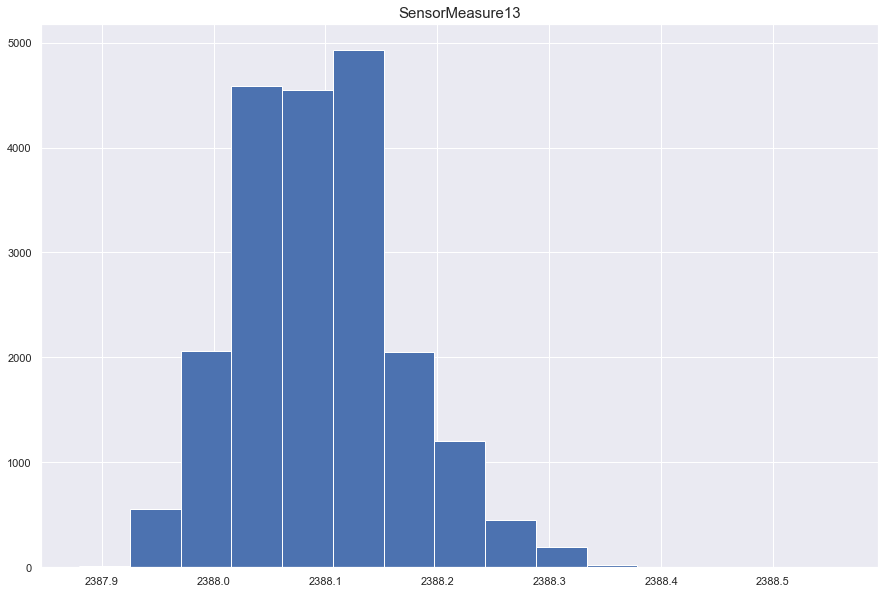

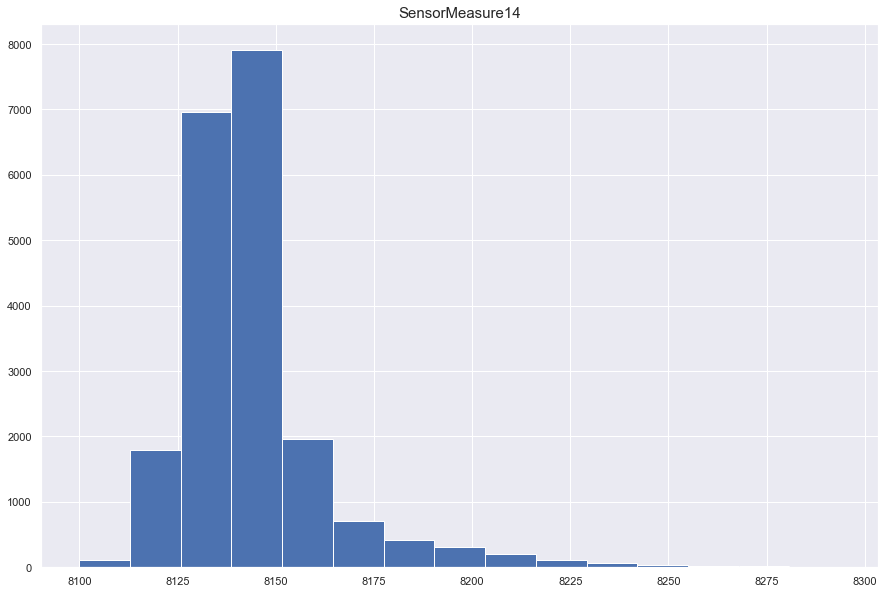

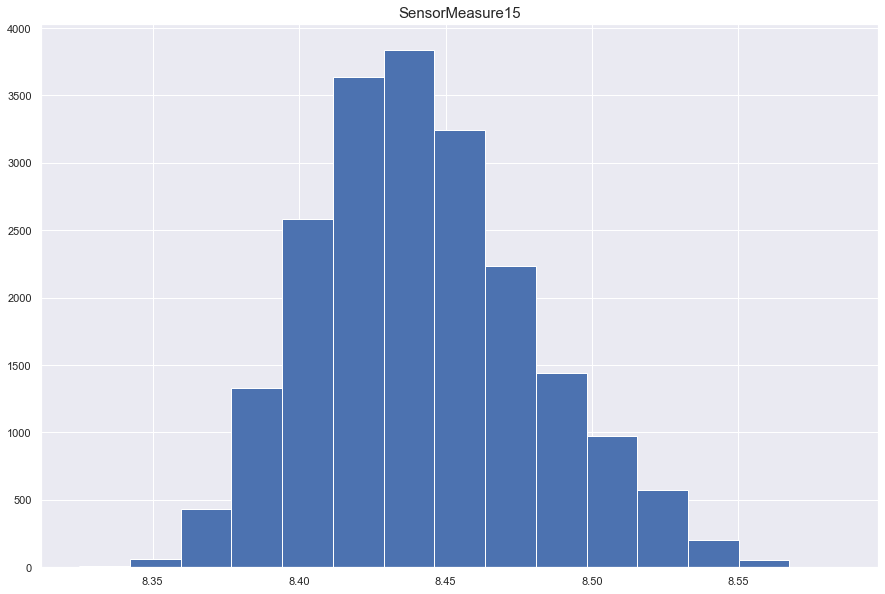

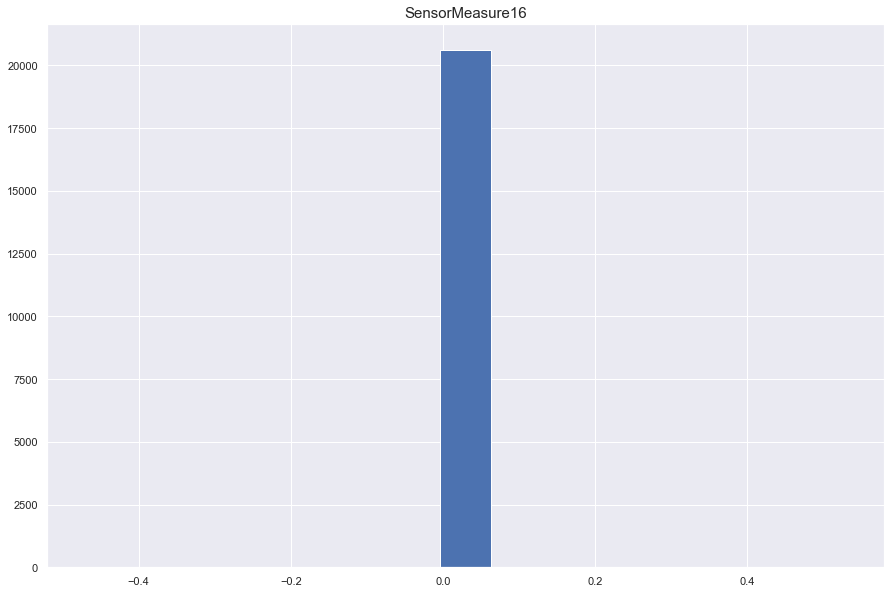

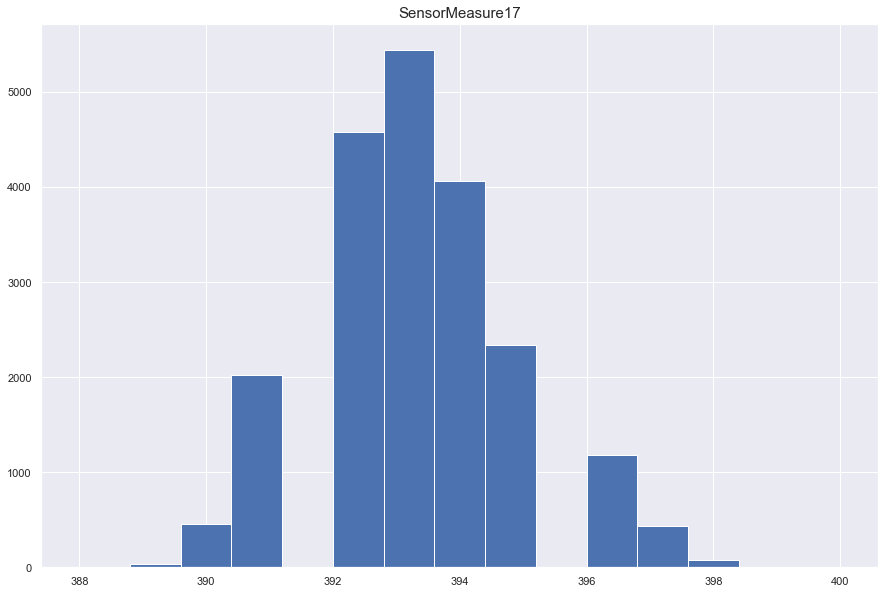

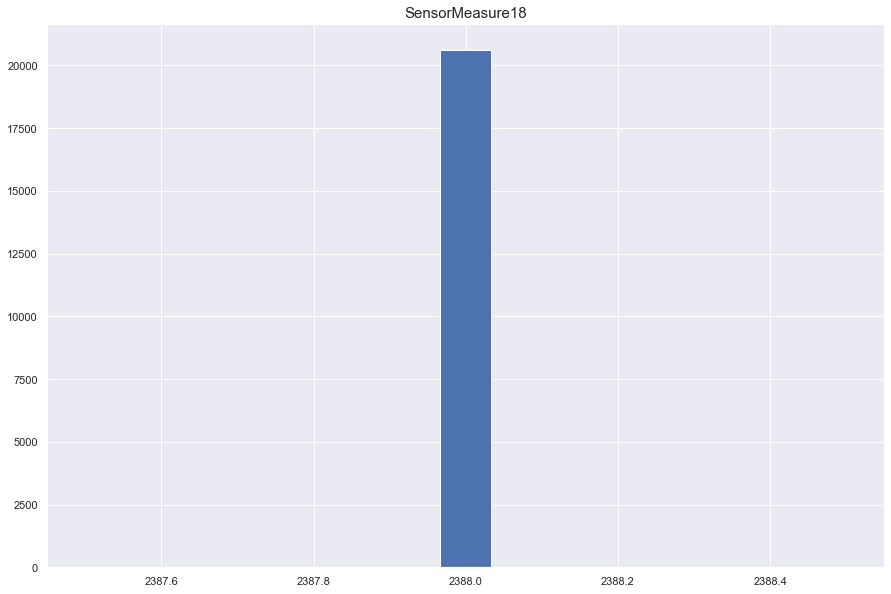

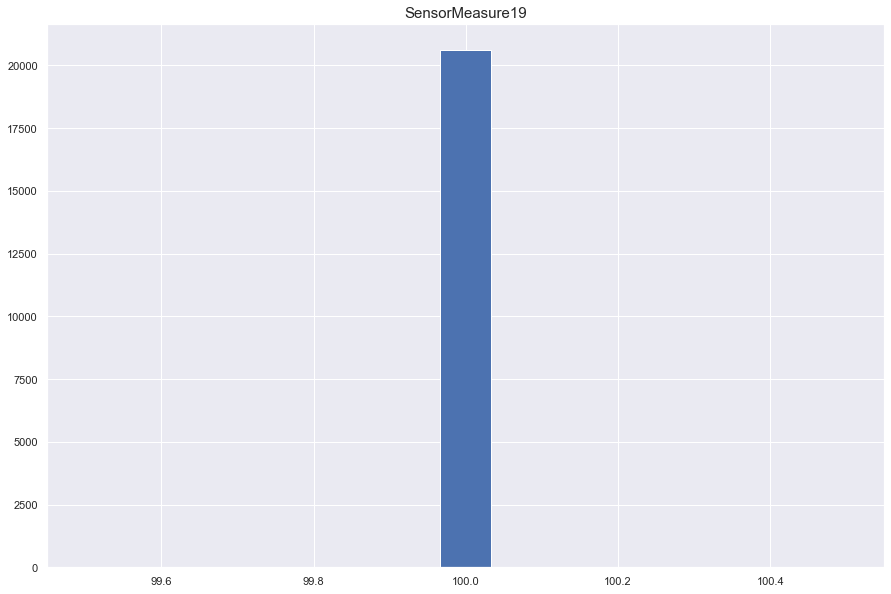

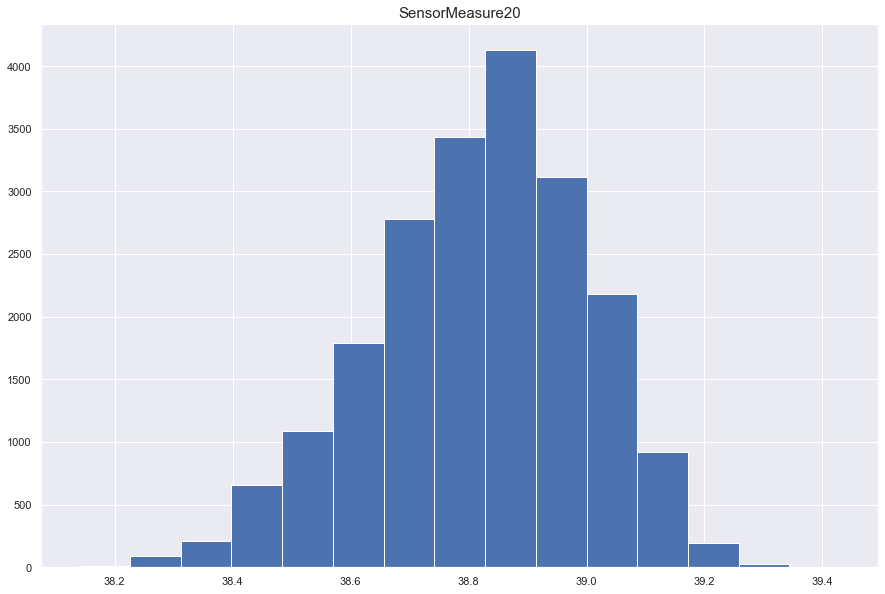

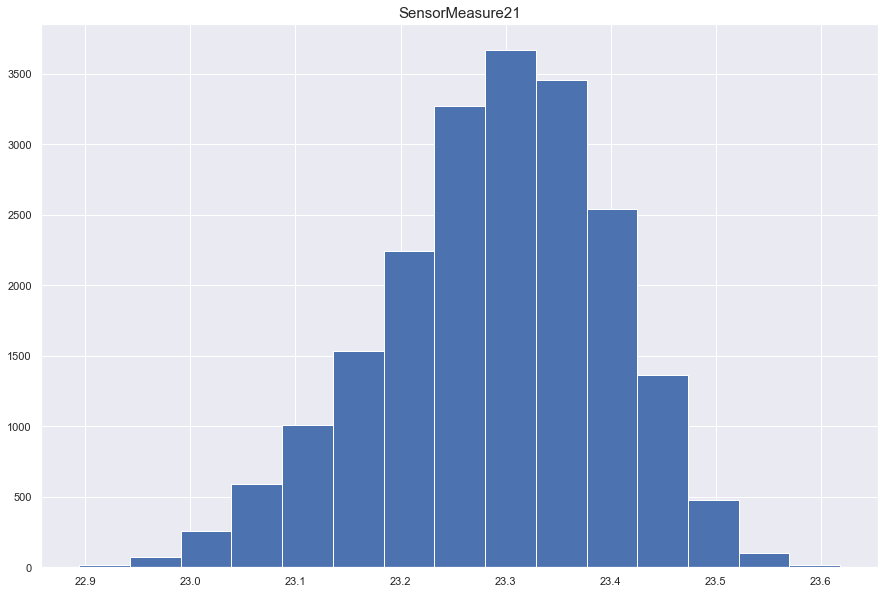

In [13]:
for i in np.arange(2, 26):
    plt.figure(figsize=(15,10))
    temp = raw_data.iloc[:, i]
    plt.hist(temp, bins = 15)
    plt.title(raw_data.columns[i], fontsize = 15)
    plt.show()

# Box Plot

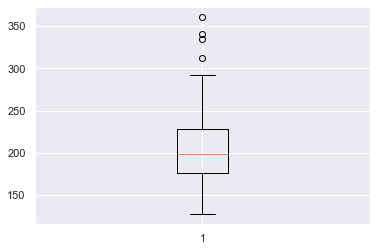

In [14]:
df_max_rul = raw_data[['ID', 'RUL']].groupby('ID').max().reset_index()
plt.boxplot(df_max_rul['RUL'])

plt.show()

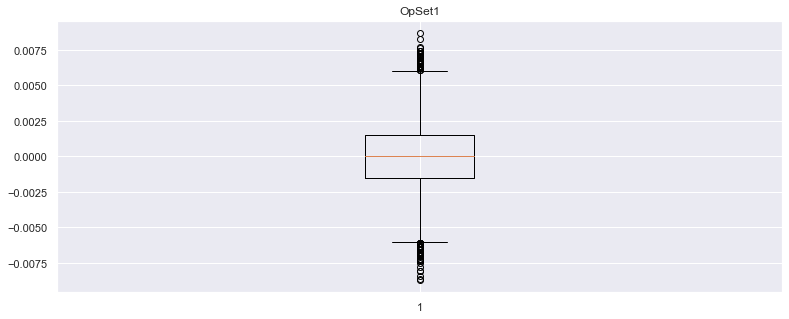

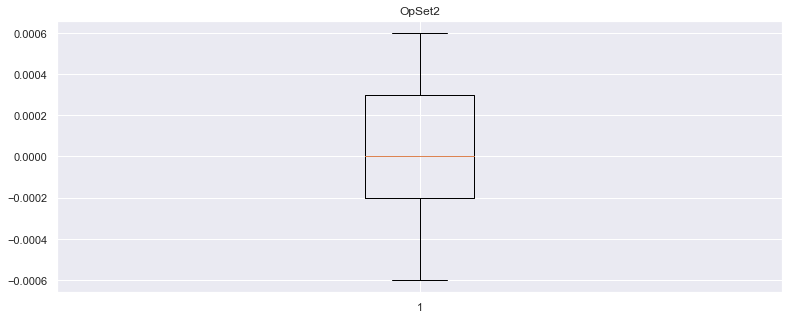

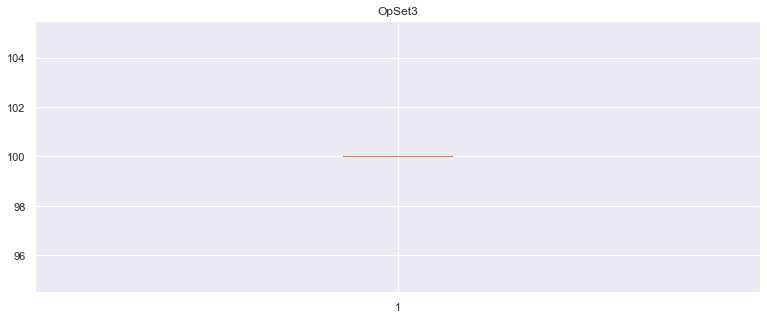

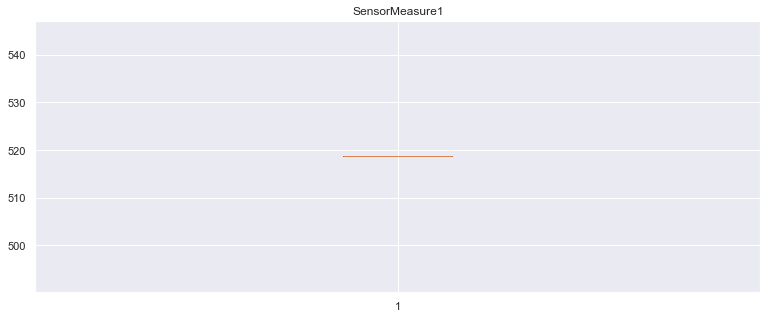

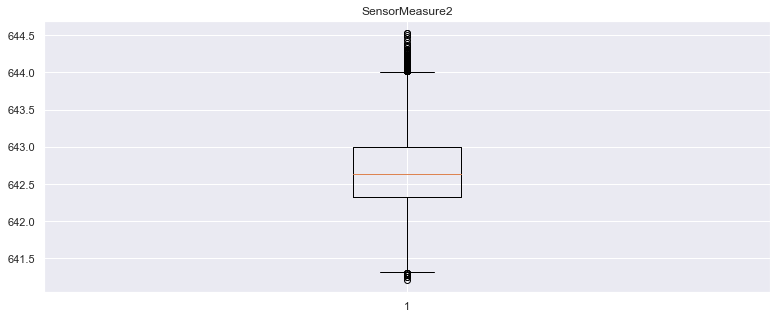

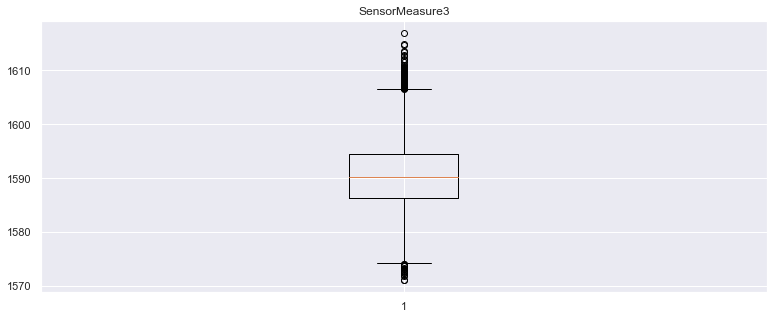

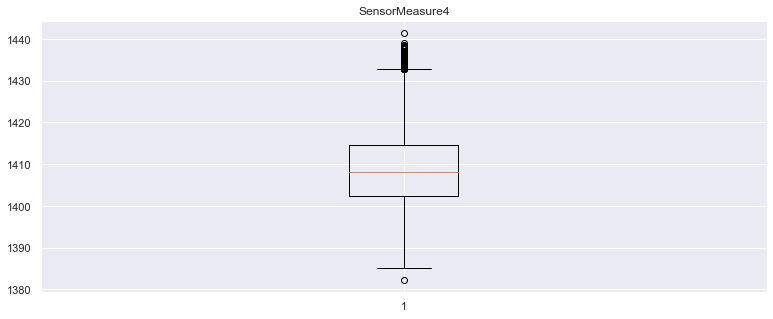

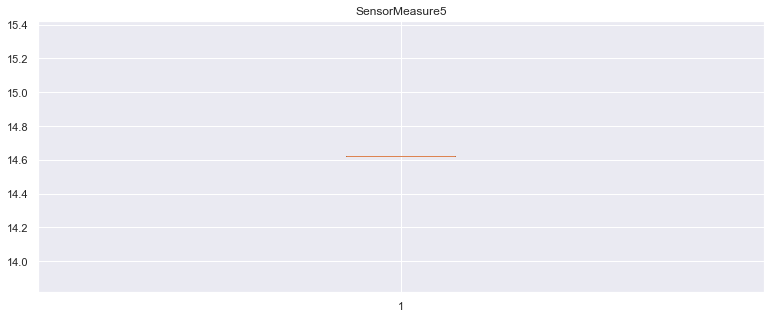

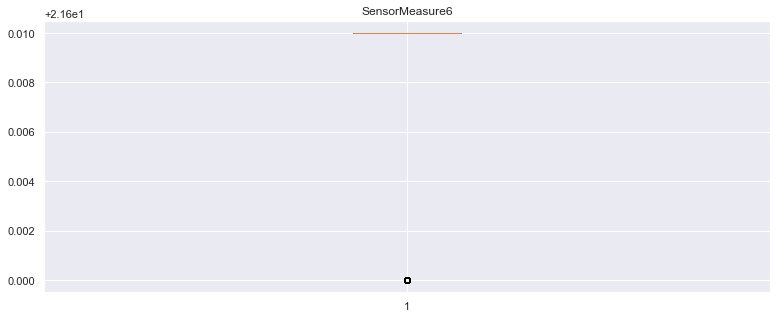

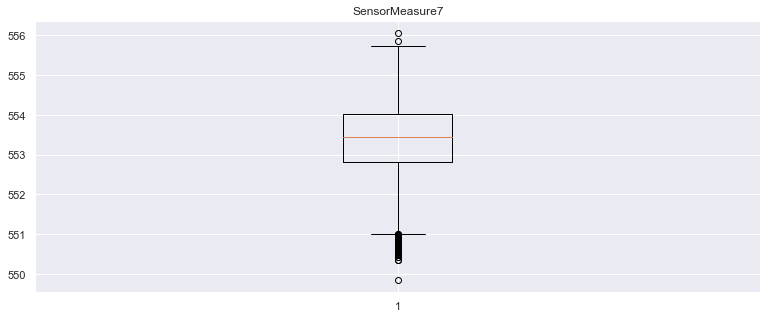

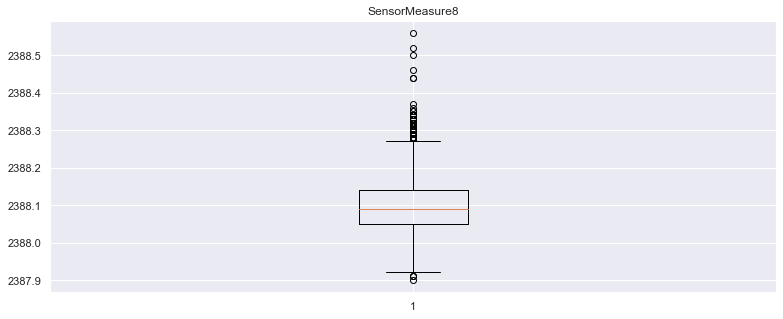

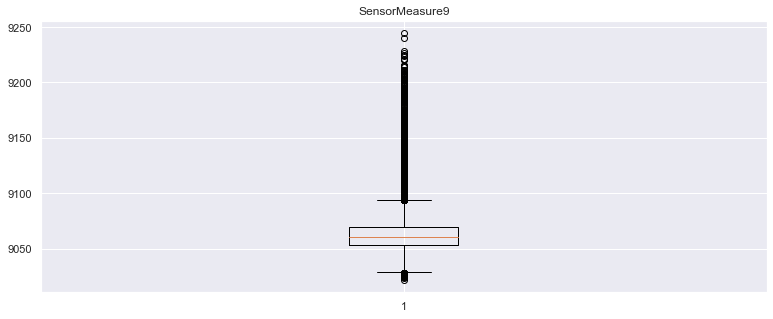

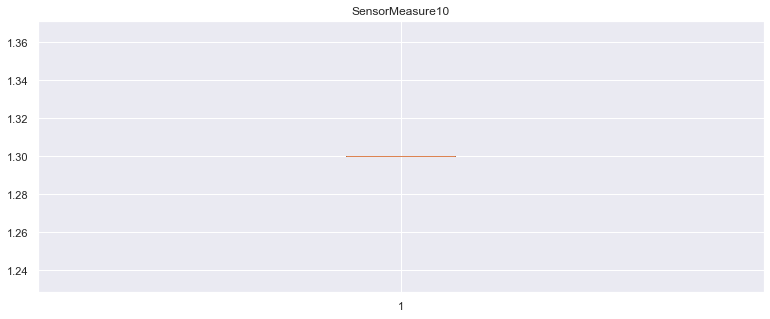

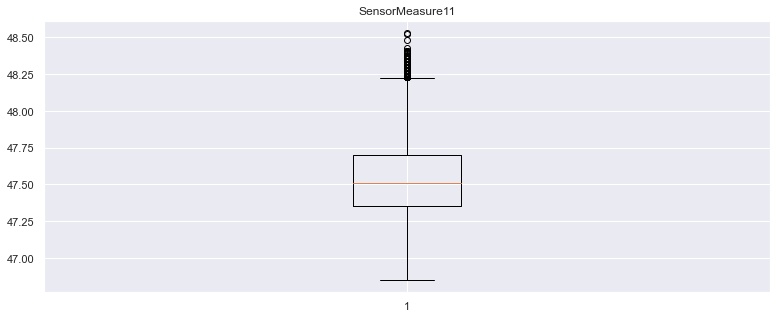

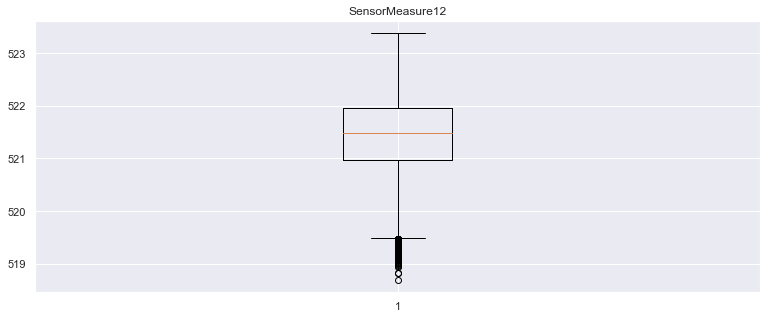

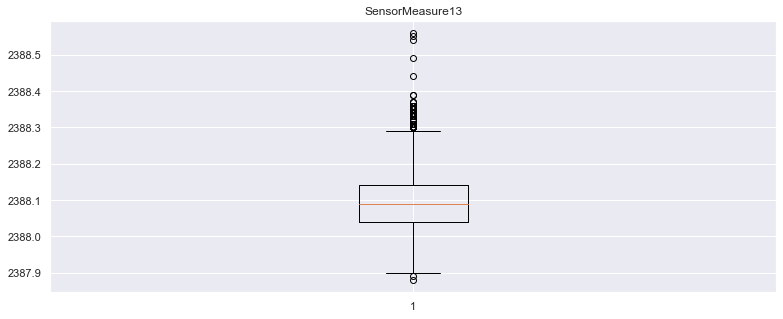

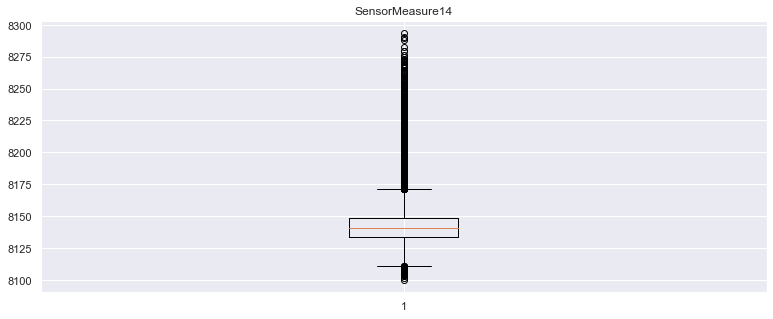

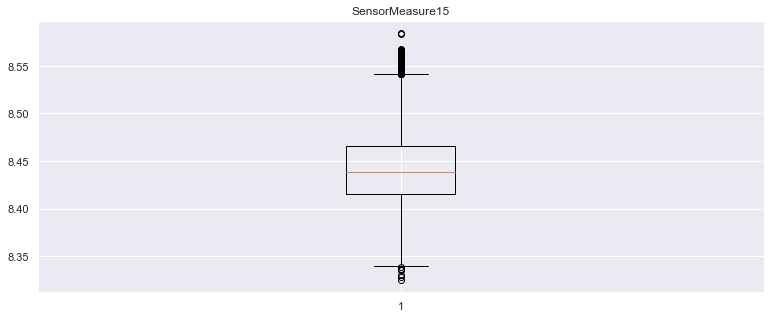

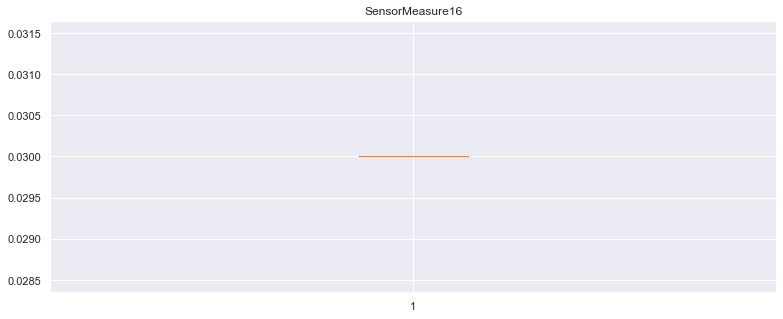

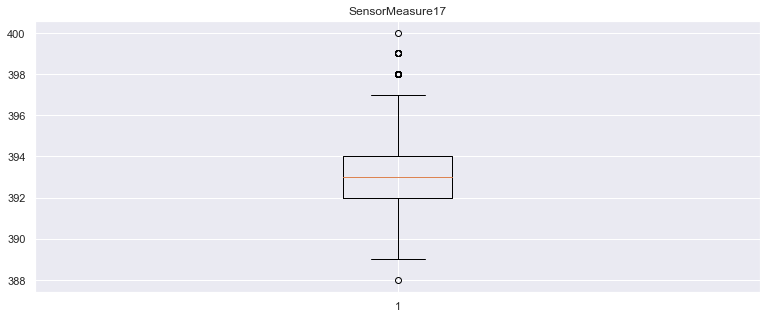

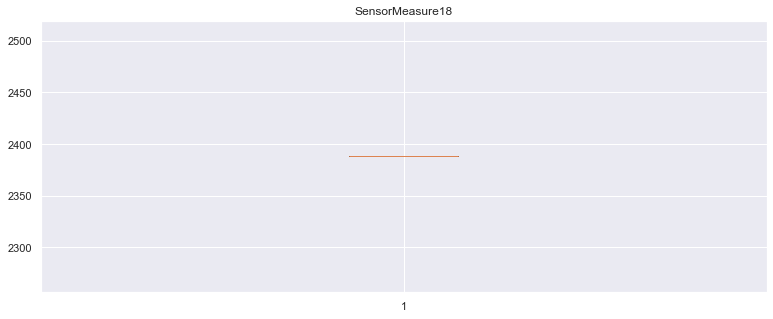

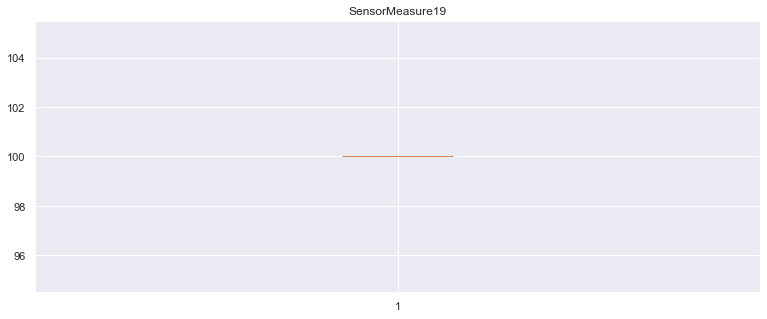

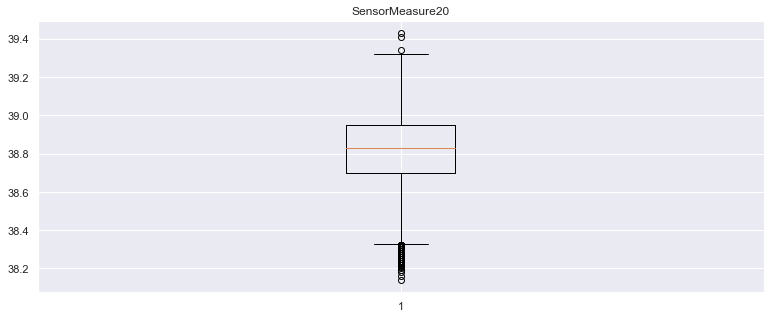

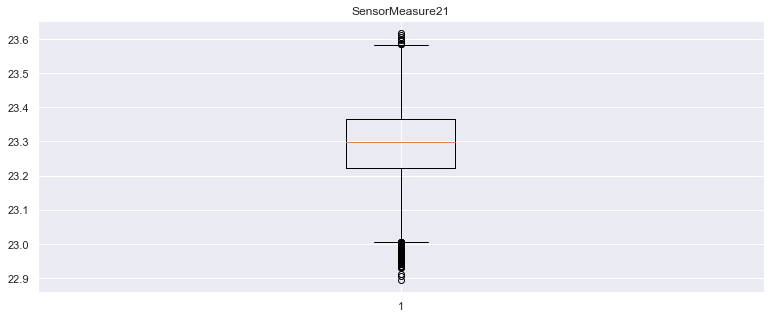

In [15]:
for i in np.arange(2, 26):
    plt.figure(figsize=(13,5))
    temp = raw_data.iloc[:, i]
    plt.boxplot(temp)
    plt.title(raw_data.columns[i])
    plt.show()

# Plot

In [16]:
def plot_sensor(sensor_name):
    plt.figure(figsize=(13,5))
    for i in raw_data['ID'].unique():
        if (i % 10 == 0):  # only plot every 10th unit_nr
            plt.plot('RUL', sensor_name, data=raw_data[raw_data['ID']==i])
    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 275, 25))
    plt.ylabel(sensor_name)
    plt.xlabel('Remaining Use fulLife')
    plt.show()

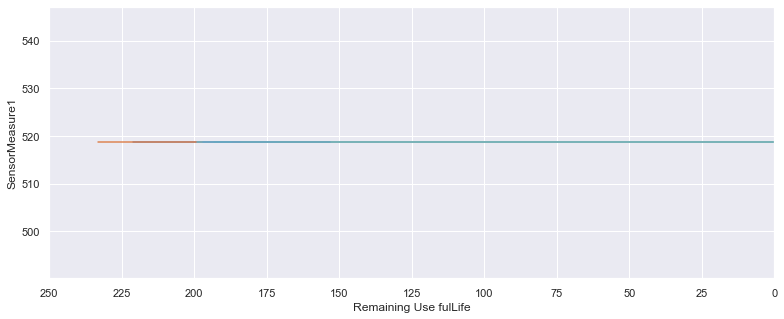

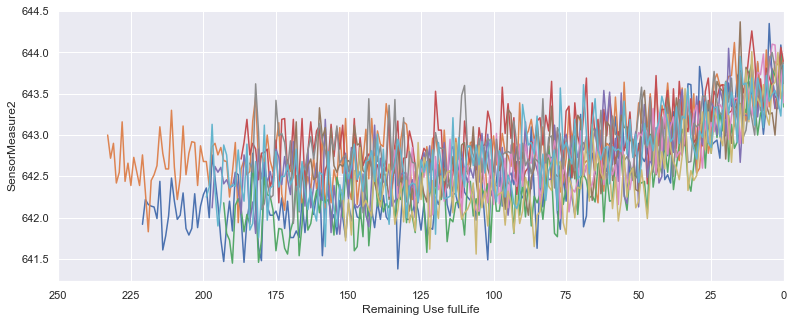

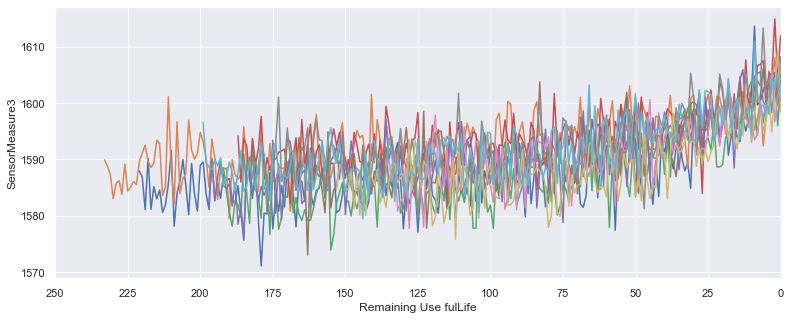

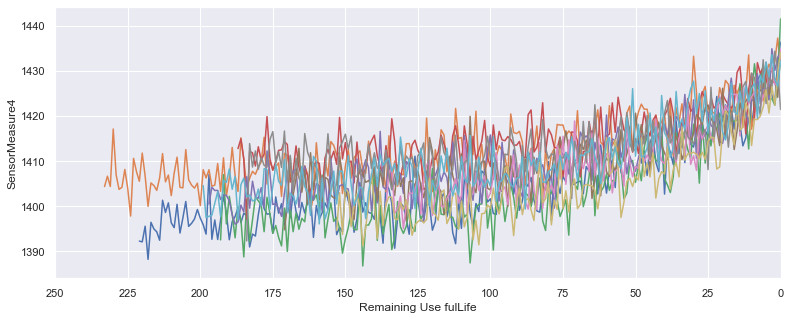

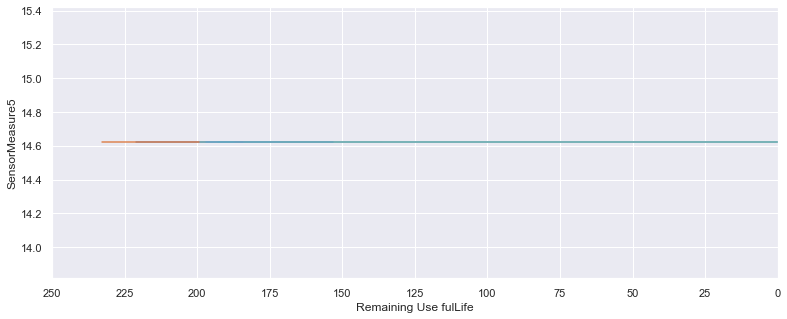

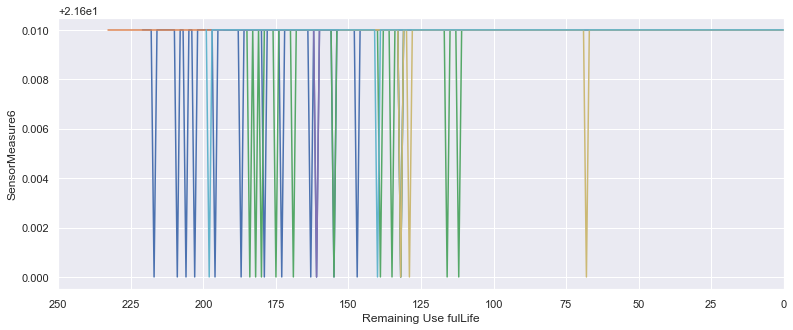

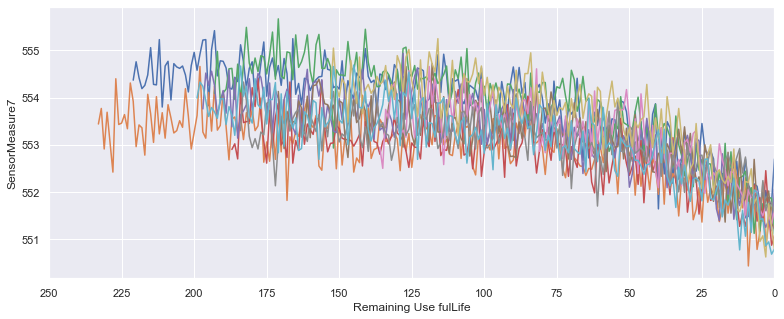

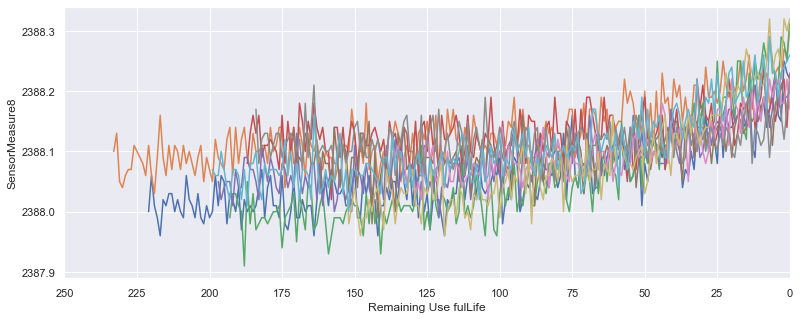

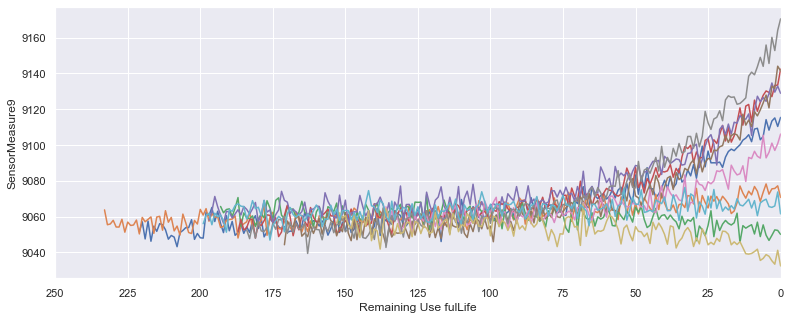

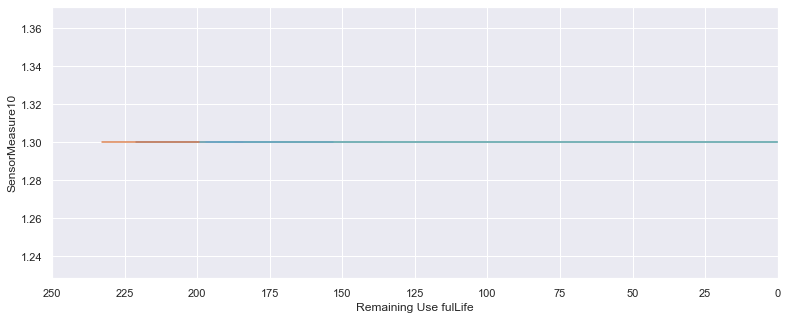

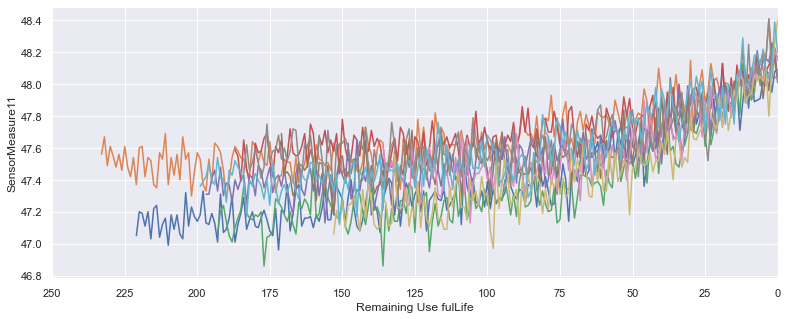

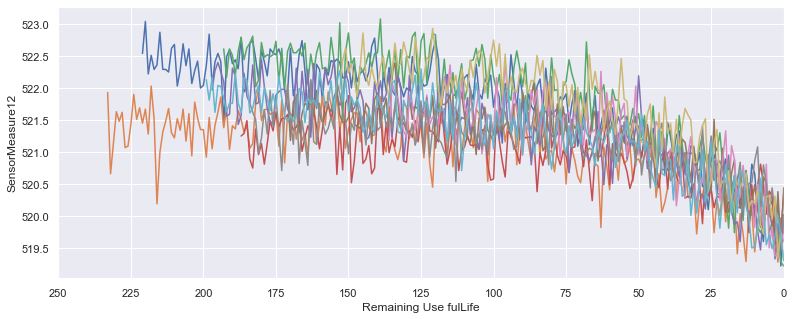

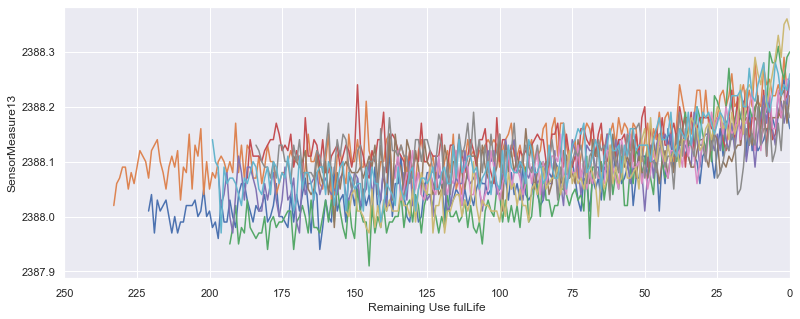

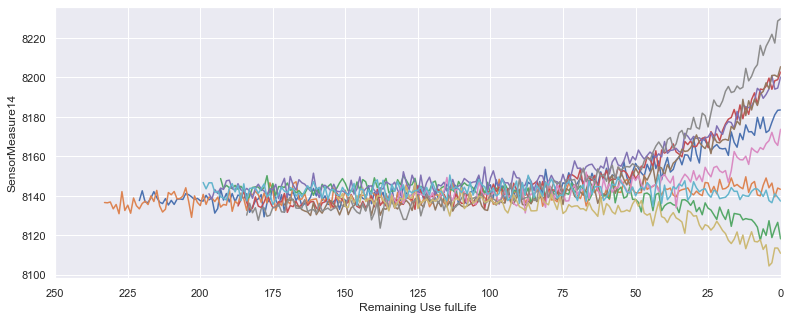

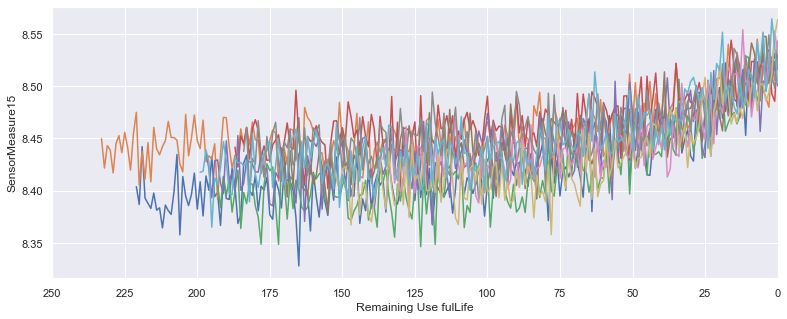

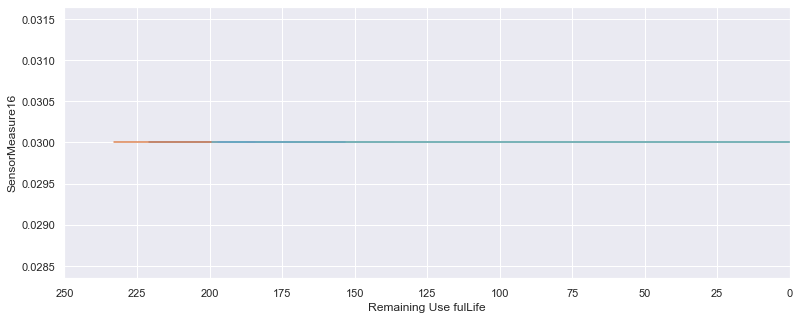

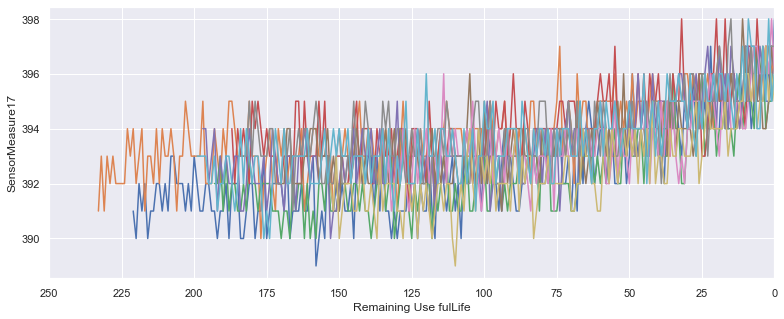

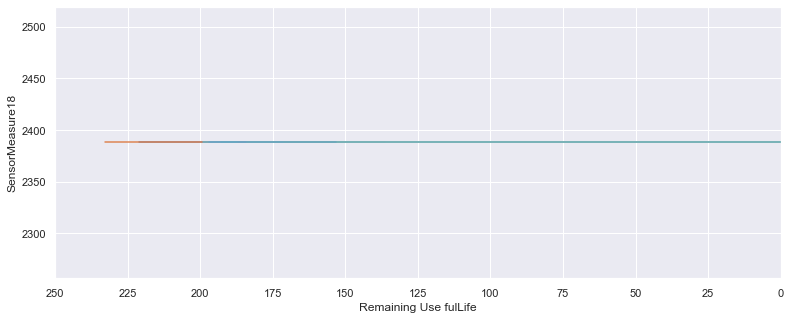

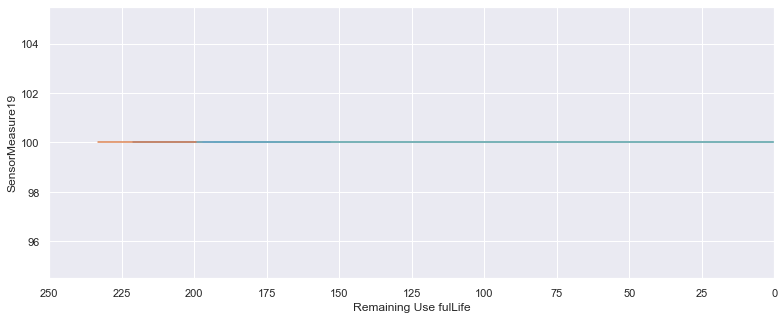

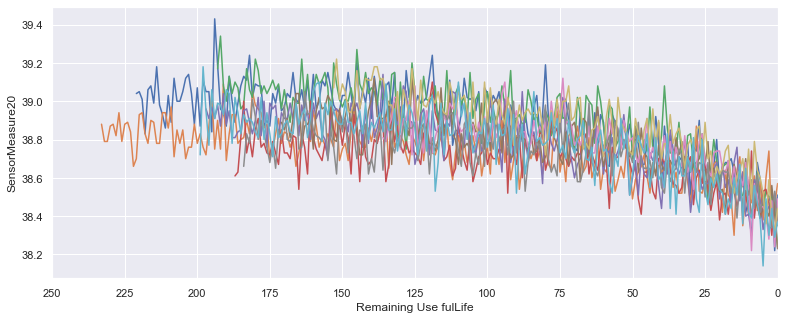

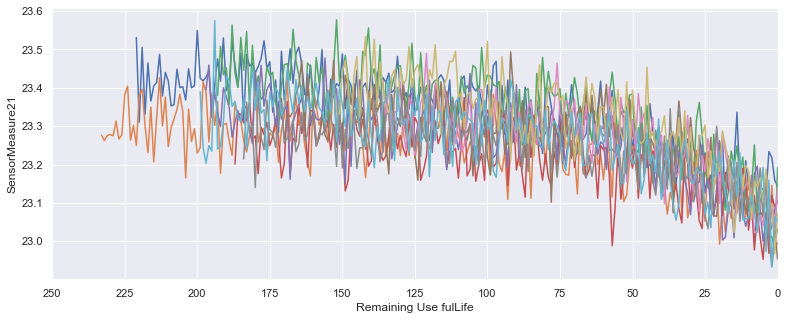

In [17]:
for sensor_name in sensor_names:
    plot_sensor(sensor_name)

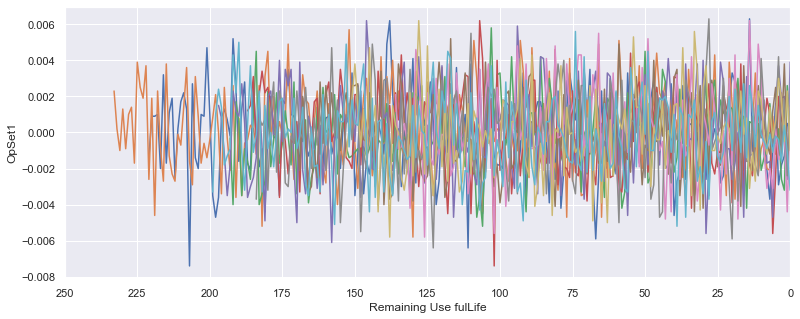

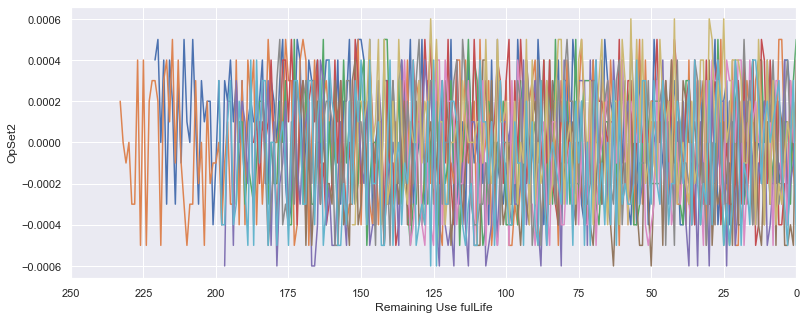

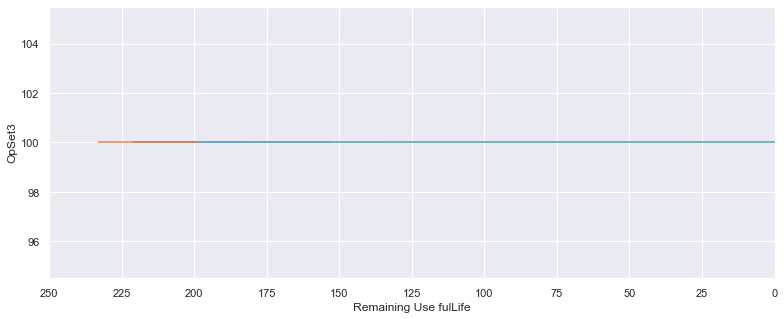

In [18]:
for setting in setting_names:
    plot_sensor(setting)